In [1]:

from part1_naive.src.naive import naive, load_matrix, store_matrix
from part2_divide_and_conquer.src.dandc import dandc
from part3_strassen.src.strassen import strassen

import numpy as np
import os


import time

import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
times_naive = []
times_dandc = []
times_strassen = []

dir_name = "part5-analysis/matrices/"
for i in range(4):
    set_name = dir_name + f"set{i}/"
    A = load_matrix(set_name + "A.txt")
    B = load_matrix(set_name + "B.txt") 

    start = time.time()
    C = naive(A, B)
    end = time.time()
    time_naive = round(end - start, 7)
    
    start = time.time()
    C = dandc(A, B)
    end = time.time()
    time_dandc = round(end - start, 7)

    start = time.time()
    C = strassen(A, B)
    end = time.time()
    time_strassen = round(end - start, 7)

    times_naive.append(time_naive)
    times_dandc.append(time_dandc)
    times_strassen.append(time_strassen)    


In [3]:
print ("Naive times:", times_naive)
print ("Divide and Conquer times:", times_dandc)
print ("Strassen times:", times_strassen)

Naive times: [6.22e-05, 0.000314, 0.0277262, 1.3584859]
Divide and Conquer times: [0.0004668, 0.0058203, 0.156745, 8.358443]
Strassen times: [0.0010791, 0.002264, 0.1354458, 6.0051992]


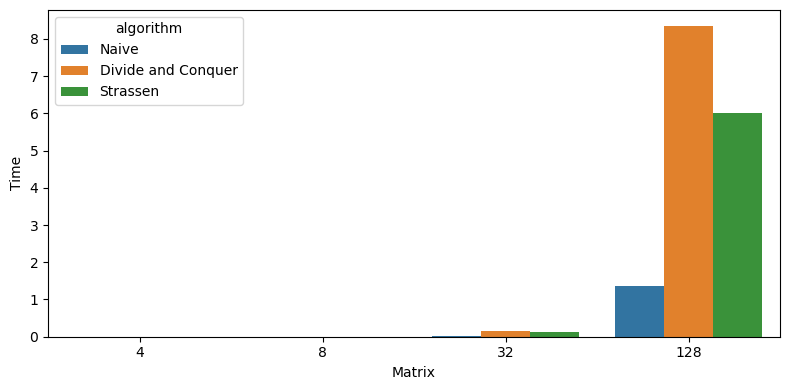

<Figure size 640x480 with 0 Axes>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

SIZES = [4, 8, 32, 128]


df = pd.DataFrame({
    "matrix_size": SIZES,
    "Naive" : times_naive,
    "Divide and Conquer": times_dandc,
    "Strassen": times_strassen,
})

df_long = df.melt(id_vars="matrix_size", var_name="algorithm", value_name="time")

plt.figure(figsize=(8,4))
sns.barplot(data=df_long, x="matrix_size", y="time", hue="algorithm")  # grouped bars
plt.ylabel("Time")
plt.xlabel("Matrix")
plt.tight_layout()
plt.show()

plt.savefig("part5-analysis/matrix_multiplication_times.pdf")